In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d norannabil/drowness-detection

100% 47.0M/47.2M [00:00<00:00, 62.9MB/s]
100% 47.2M/47.2M [00:00<00:00, 68.0MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/drowness-detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

In [5]:
activefile=os.listdir('/content/data_cropped/Active')
print(activefile)
print(len(activefile))

['Image_Num_850.jpg', 'Image_Num_1162.jpg', 'Image_Num_796.jpg', 'Image_Num_991.jpg', 'Image_Num_1577.jpg', 'Image_Num_982.jpg', 'Image_Num_340.jpg', 'Image_Num_1030.jpg', 'Image_Num_187.jpg', 'Image_Num_1117.jpg', 'Image_Num_909.jpg', 'Image_Num_1508.jpg', 'Image_Num_1486.jpg', 'Image_Num_1190.jpg', 'Image_Num_1026.jpg', 'Image_Num_1125.jpg', 'Image_Num_1124.jpg', 'Image_Num_691.jpg', 'Image_Num_1224.jpg', 'Image_Num_916.jpg', 'Image_Num_1283.jpg', 'Image_Num_448.jpg', 'Image_Num_20.jpg', 'Image_Num_214.jpg', 'Image_Num_1373.jpg', 'Image_Num_1160.jpg', 'Image_Num_759.jpg', 'Image_Num_585.jpg', 'Image_Num_1461.jpg', 'Image_Num_547.jpg', 'Image_Num_748.jpg', 'Image_Num_280.jpg', 'Image_Num_516.jpg', 'Image_Num_33.jpg', 'Image_Num_737.jpg', 'Image_Num_927.jpg', 'Image_Num_593.jpg', 'Image_Num_457.jpg', 'Image_Num_674.jpg', 'Image_Num_1396.jpg', 'Image_Num_1443.jpg', 'Image_Num_1430.jpg', 'Image_Num_1167.jpg', 'Image_Num_406.jpg', 'Image_Num_304.jpg', 'Image_Num_967.jpg', 'Image_Num_339.j

In [14]:
data=[]

In [15]:
for i in range(1583):
  img_path='/content/data_cropped/Active/'+activefile[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resized=img_color.resize((64,64))
  img_arr=np.array(img_resized)
  data.append([img_arr,0])

In [16]:
sleepfile=os.listdir('/content/data_cropped/Sleep')
print(sleepfile)
print(len(sleepfile))

['Image_Num_850.jpg', 'Image_Num_1162.jpg', 'Image_Num_796.jpg', 'Image_Num_991.jpg', 'Image_Num_982.jpg', 'Image_Num_340.jpg', 'Image_Num_1030.jpg', 'Image_Num_187.jpg', 'Image_Num_1117.jpg', 'Image_Num_909.jpg', 'Image_Num_1190.jpg', 'Image_Num_1026.jpg', 'Image_Num_1125.jpg', 'Image_Num_1124.jpg', 'Image_Num_691.jpg', 'Image_Num_1224.jpg', 'Image_Num_916.jpg', 'Image_Num_1283.jpg', 'Image_Num_448.jpg', 'Image_Num_20.jpg', 'Image_Num_214.jpg', 'Image_Num_1160.jpg', 'Image_Num_759.jpg', 'Image_Num_585.jpg', 'Image_Num_547.jpg', 'Image_Num_748.jpg', 'Image_Num_280.jpg', 'Image_Num_516.jpg', 'Image_Num_33.jpg', 'Image_Num_737.jpg', 'Image_Num_927.jpg', 'Image_Num_593.jpg', 'Image_Num_457.jpg', 'Image_Num_674.jpg', 'Image_Num_1167.jpg', 'Image_Num_406.jpg', 'Image_Num_304.jpg', 'Image_Num_967.jpg', 'Image_Num_339.jpg', 'Image_Num_1065.jpg', 'Image_Num_853.jpg', 'Image_Num_824.jpg', 'Image_Num_1052.jpg', 'Image_Num_1005.jpg', 'Image_Num_1199.jpg', 'Image_Num_1185.jpg', 'Image_Num_1266.jpg

In [17]:
for i in range(1283):
  img_path='/content/data_cropped/Sleep/'+sleepfile[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resized=img_color.resize((64,64))
  img_arr=np.array(img_resized)
  data.append([img_arr,1])

In [18]:
yawnfile=os.listdir('/content/data_cropped/Yawn')
print(yawnfile)
print(len(yawnfile))

['Image_Num_850.jpg', 'Image_Num_796.jpg', 'Image_Num_991.jpg', 'Image_Num_982.jpg', 'Image_Num_340.jpg', 'Image_Num_187.jpg', 'Image_Num_909.jpg', 'Image_Num_691.jpg', 'Image_Num_916.jpg', 'Image_Num_448.jpg', 'Image_Num_20.jpg', 'Image_Num_214.jpg', 'Image_Num_759.jpg', 'Image_Num_585.jpg', 'Image_Num_547.jpg', 'Image_Num_748.jpg', 'Image_Num_280.jpg', 'Image_Num_516.jpg', 'Image_Num_33.jpg', 'Image_Num_737.jpg', 'Image_Num_927.jpg', 'Image_Num_593.jpg', 'Image_Num_457.jpg', 'Image_Num_674.jpg', 'Image_Num_406.jpg', 'Image_Num_304.jpg', 'Image_Num_967.jpg', 'Image_Num_339.jpg', 'Image_Num_853.jpg', 'Image_Num_824.jpg', 'Image_Num_1005.jpg', 'Image_Num_902.jpg', 'Image_Num_716.jpg', 'Image_Num_37.jpg', 'Image_Num_97.jpg', 'Image_Num_646.jpg', 'Image_Num_88.jpg', 'Image_Num_164.jpg', 'Image_Num_686.jpg', 'Image_Num_397.jpg', 'Image_Num_23.jpg', 'Image_Num_213.jpg', 'Image_Num_329.jpg', 'Image_Num_628.jpg', 'Image_Num_420.jpg', 'Image_Num_913.jpg', 'Image_Num_715.jpg', 'Image_Num_27.jpg

In [19]:
for i in range(1011):
  img_path='/content/data_cropped/Yawn/'+yawnfile[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert('RGB')
  img_resized=img_color.resize((64,64))
  img_arr=np.array(img_resized)
  data.append([img_arr,2])

In [20]:
len(data)

3877

In [48]:
import random
random.shuffle(data)

In [49]:
x=[]
y=[]
for i,j in data:
  x.append(i)
  y.append(j)

In [50]:
type(x[0])

numpy.ndarray

In [51]:
x=np.array(x)
y=np.array(y)

In [52]:
x.shape

(3877, 64, 64, 3)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [54]:
print(x.shape,x_train.shape,x_test.shape)

(3877, 64, 64, 3) (3489, 64, 64, 3) (388, 64, 64, 3)


In [55]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

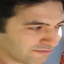

In [56]:
from google.colab.patches import cv2_imshow
cv2_imshow(x_train[0])

In [ ]:
x_train_scaled[0]

In [58]:
import tensorflow as tf
from tensorflow import keras

In [59]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(64,64,3)),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(3,activation='softmax')
])

In [60]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.fit(x_train_scaled,y_train,epochs=50)

Epoch 1/50
110/110 [==============================] - 2s 9ms/step - loss: 0.7843 - accuracy: 0.6076
Epoch 2/50
110/110 [==============================] - 1s 12ms/step - loss: 0.5697 - accuracy: 0.7409
Epoch 3/50
110/110 [==============================] - 2s 14ms/step - loss: 0.5110 - accuracy: 0.7707
Epoch 4/50
110/110 [==============================] - 3s 30ms/step - loss: 0.5182 - accuracy: 0.7764
Epoch 5/50
110/110 [==============================] - 2s 17ms/step - loss: 0.4492 - accuracy: 0.8028
Epoch 6/50
110/110 [==============================] - 1s 11ms/step - loss: 0.4014 - accuracy: 0.8421
Epoch 7/50
110/110 [==============================] - 1s 13ms/step - loss: 0.3951 - accuracy: 0.8389
Epoch 8/50
110/110 [==============================] - 1s 12ms/step - loss: 0.3929 - accuracy: 0.8395
Epoch 9/50
110/110 [==============================] - 1s 9ms/step - loss: 0.3961 - accuracy: 0.8458
Epoch 10/50
110/110 [==============================] - 1s 9ms/step - loss: 0.3166 - accuracy:

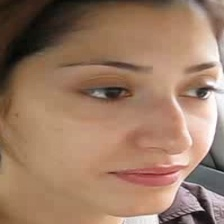

In [67]:
img_path='/content/data_cropped/Active/Image_Num_1.jpg'
img_arr=Image.open(img_path)
img_arr=np.array(img_arr)
cv2_imshow(img_arr)

In [69]:
input_img_path='/content/data_cropped/Yawn/Image_Num_1.jpg'
img_pillow=Image.open(input_img_path)
img_color=img_pillow.convert('RGB')
img_resize=img_color.resize((64,64))
img_array=np.array(img_resize)
img_scaled=img_array/255
img_reshaped=np.reshape(img_scaled,[1,64,64,3])
prediction=model.predict(img_reshaped)
output=np.argmax(prediction)
if(output==0):
  print('The person is Ative so he can drive car')
elif(output==1):
  print('The person is Sleepy so he cannot drive car')
else:
  print('The person is Yawn so better not to drive car')

1/1 [==============================] - 0s 23ms/step
The person is Yawn so better not to drive car
